# Analizar una Base de Datos de Perros

Sitio: [The Dog Api](https://thedogapi.com/).

La misión consiste en lograr obtener un dataset que contiene información sobre razas de perro ("breeds"), y crear visualizaciones que permitan responder algunas preguntas sobre la **expectativa de vida**, y el **temperamento** más frecuente entre todas las **razas**.


### Preguntas a responder
1. ¿Cuál es la esperanza de vida (en años) más frecuente entre todas las razas de perro?
2. ¿Cuál es el temperamento más frecuente entre todas las razas de perros?


### Pasos sugeridos para llegar hasta la respuesta
1. Descarga las **librerías** necesarias.
2. Explora el sitio [https://thedogapi.com/](https://thedogapi.com/) para identificar dónde y cómo se describe el funcionamiento de su API. Identifica la **API específica** con información sobre **razas** ("breeds"). Una vez que lo hagas, implementa la API y guarda esos datos en un **DataFrame** de Pandas.
3. Realiza un **análisis exploratorio** para conocer la estrucutra y calidad de tus datos.
4. Implementa la **limpieza de datos** que consideres necesaria.
5. Crea los **gráficos** que creas necesarios para poder visualizar con claridad la respuesta a las preguntas.

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://api.thedogapi.com/v1/breeds'

In [4]:
respuesta = requests.get(url)
data = respuesta.json()
df = pd.DataFrame(data)

In [5]:
df.head()

,weight,height,id,name,bred_for,breed_group,life_span,temperament,origin,reference_image_id,country_code,description,history
0,"{'imperial': '6 - 13', 'metric': '3 - 6'}","{'imperial': '9 - 11.5', 'metric': '23 - 29'}",1,Affenpinscher,"Small rodent hunting, lapdog",Toy,10 - 12 years,"Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,NaN,NaN,NaN
1,"{'imperial': '50 - 60', 'metric': '23 - 27'}","{'imperial': '25 - 27', 'metric': '64 - 69'}",2,Afghan Hound,Coursing and hunting,Hound,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy","Afghanistan, Iran, Pakistan",hMyT4CDXR,AG,NaN,NaN
2,"{'imperial': '44 - 66', 'metric': '20 - 30'}","{'imperial': '30', 'metric': '76'}",3,African Hunting Dog,A wild pack animal,NaN,11 years,"Wild, Hardworking, Dutiful",,rkiByec47,NaN,NaN,NaN
3,"{'imperial': '40 - 65', 'metric': '18 - 29'}","{'imperial': '21 - 23', 'metric': '53 - 58'}",4,Airedale Terrier,"Badger, otter hunting",Terrier,10 - 13 years,"Outgoing, Friendly, Alert, Confident, Intellig...","United Kingdom, England",1-7cgoZSh,NaN,NaN,NaN
4,"{'imperial': '90 - 120', 'metric': '41 - 54'}","{'imperial': '28 - 34', 'metric': '71 - 86'}",5,Akbash Dog,Sheep guarding,Working,10 - 12 years,"Loyal, Independent, Intelligent, Brave",,26pHT3Qk7,NaN,NaN,NaN


In [6]:
numeros = []
for span in df['life_span']:
    numero = int(span.split()[0])
    numeros.append(numero)

df['life_span'] = numeros

In [7]:
columnas_de_interes = ["life_span", "temperament"]
df = df[columnas_de_interes]
df

,life_span,temperament
0,10,"Stubborn, Curious, Playful, Adventurous, Activ..."
1,10,"Aloof, Clownish, Dignified, Independent, Happy"
2,11,"Wild, Hardworking, Dutiful"
3,10,"Outgoing, Friendly, Alert, Confident, Intellig..."
4,10,"Loyal, Independent, Intelligent, Brave"
...,...,...
167,13,"Fearless, Friendly, Bold, Keen, Alert, Quick"
168,12,"Loyal, Gentle, Vigilant, Trainable, Proud"
169,12,NaN
170,12,"Cheerful, Alert, Companionable, Intelligent, P..."


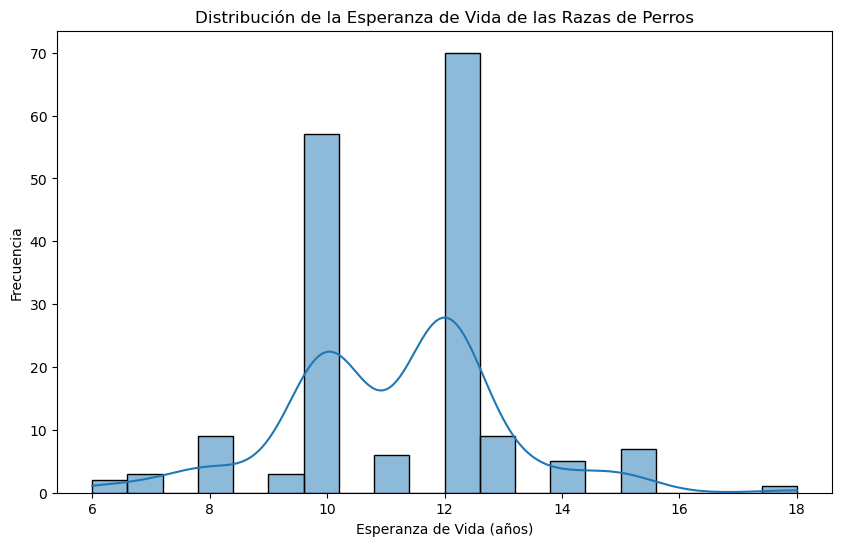

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['life_span'], kde=True, bins=20)
plt.title('Distribución de la Esperanza de Vida de las Razas de Perros')
plt.xlabel('Esperanza de Vida (años)')
plt.ylabel('Frecuencia');

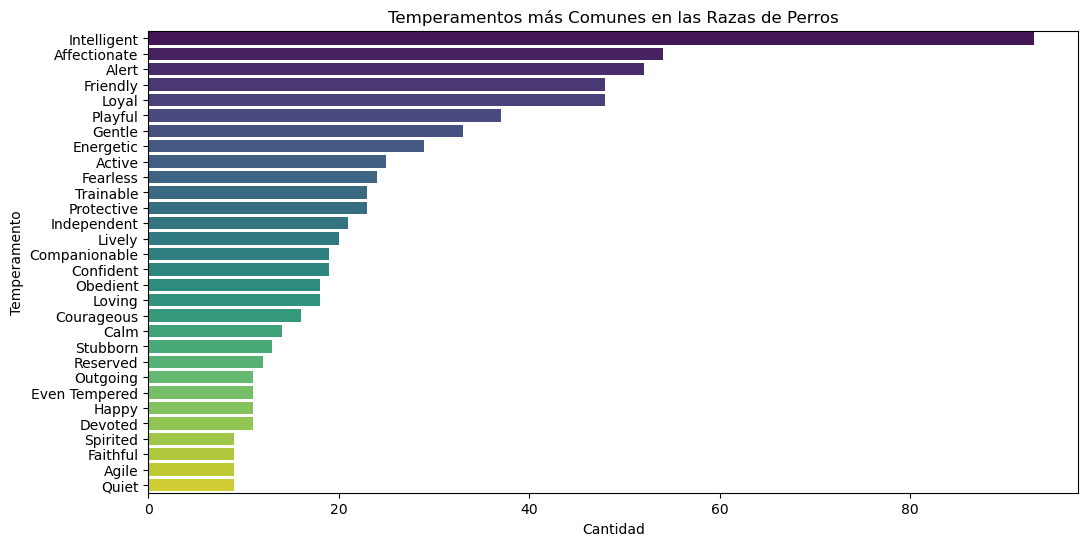

In [9]:
# Dividir los temperamentos en una lista de palabras
lista_temperamentos = df['temperament'].dropna().str.split(', ')
temperamentos = []
for sublista in lista_temperamentos:
    for temperamento in sublista:
        temperamentos.append(temperamento)

# Contar los temperamentos usando pandas
serie_temperamentos = pd.Series(temperamentos)
conteo_temperamentos = serie_temperamentos.value_counts().head(30).reset_index()
conteo_temperamentos.columns = ['Temperamento', 'Conteo']

# Graficar los temperamentos más comunes
plt.figure(figsize=(12, 6))
sns.barplot(x='Conteo', y='Temperamento', data=conteo_temperamentos, hue='Temperamento', legend=False, palette='viridis')
plt.title('Temperamentos más Comunes en las Razas de Perros')
plt.xlabel('Cantidad')
plt.ylabel('Temperamento');

## Respuestas
1. ¿Cuál es la esperanza de vida (en años) más frecuente entre todas las razas de perro?

**Respuesta**: 12 años

2. ¿Cuál es el temperamento más frecuente entre todas las razas de perros?

**Respuesta**: Inteligencia